In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import DenseNet121
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x = np.load('/content/drive/MyDrive/DLBA/Noisy/Xfs_speckle.npy')
y = np.load('/content/drive/MyDrive/DLBA/Noisy/Y_speckle.npy')

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=7)

# Create DenseNet base
input_shape = x_train.shape[1:]  # Assuming x_train is a numpy array of images
input_shape

(128, 128, 3)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(750, 128, 128, 3)
(750, 128, 128, 3)


In [ ]:
pip install vit-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y inflect
!pip install "inflect<7.0.0"
!pip install tensorflow-addons

Found existing installation: inflect 7.4.0
Uninstalling inflect-7.4.0:
  Successfully uninstalled inflect-7.4.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1


In [ ]:
!pip install --upgrade tensorflow-addons

In [ ]:
pip install tensorflow==2.9.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 26.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from vit_keras import vit

def create_ViT_base(input_shape):
    # Load ViT model without the top layer
    base_model = vit.build_model(image_size=input_shape[0], patch_size=16, num_layers=12, activation='linear',
                                 classes = 3, hidden_size =144, num_heads = 12, name = 'ViT_Dem', mlp_dim = 512, include_top=False)

    # Perform global average pooling
    x = base_model.output
    #x = GlobalAveragePooling2D()(x)

    # Add a dense layer with 125 sigmoid activated neurons
    x = Dense(125, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)
    return model

def create_classification_model(base_model, num_classes):
    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = True

    # Add a dense layer with softmax activation for classification
    x = Dense(num_classes, activation='softmax')(base_model.output)

    # Create the classification model
    model = Model(inputs=base_model.input, outputs=x)

    return model

base_model = create_ViT_base(input_shape)

num_classes = 3  # Change this to the number of classes in your classification task
classification_model = create_classification_model(base_model, num_classes)

classification_model.summary()


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 8, 8, 144)         110736    
                                                                 
 reshape (Reshape)           (None, 64, 144)           0         
                                                                 
 class_token (ClassToken)    (None, 65, 144)           144       
                                                                 
 Transformer/posembed_input   (None, 65, 144)          9360      
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 65, 144),        232208    
 (TransformerBlock)           (None, 12, None, None))      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("/content/drive/MyDrive/vit.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Train the model

# history = classification_model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test), callbacks=[checkpoint, early_stopping, reduce_lr])
######################################################

classification_model.load_weights("/content/drive/MyDrive/vit.keras")
classification_model.evaluate(x_test, y_test)

######################################################
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming classification_model.predict returns probabilities or predicted classes
y_pred = classification_model.predict(x_test)

# If y_pred contains probabilities, you may want to convert them to classes
# For binary classification:
# y_pred_classes = (y_pred > 0.5).astype(int)

# For multi-class classification with softmax output:
y_pred_classes = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report

# Assuming y_pred_classes are predicted classes

# Generate classification report
report = classification_report(y_test, y_pred_classes, digits=5)

# Print the report
print("Classification Report:")
print(report)



import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

# Save the initial weights of the model
initial_weights = classification_model.get_weights()

# Define the hyperparameter grid
patience_values =  [5, 7]  # Possible patience values
min_lr_values = [1e-5, 1e-6]  # Possible min_lr values

# Variables to store the best results
best_loss = np.inf
best_patience = None
best_min_lr = None
best_weights = None

# Loop over all combinations of patience and min_lr
for patience in patience_values:
    for min_lr in min_lr_values:
        print(f"\nTraining with patience={patience}, min_lr={min_lr}")

        # Reset model weights to initial state
        classification_model.set_weights(initial_weights)

        # Compile the model
        classification_model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        # Define callbacks with current hyperparameters
        checkpoint = ModelCheckpoint(
            filepath="/content/drive/MyDrive/vit.keras",
            monitor='val_loss',
            verbose=0,
            save_best_only=True,
            mode='min'
        )

        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=patience,
            verbose=0,
            restore_best_weights=True
        )

        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=max(1, patience - 2),  # Ensure patience is at least 1
            min_lr=min_lr,
            verbose=0
        )

        # Train the model
        history = classification_model.fit(
            x_train,
            y_train,
            epochs=25,
            batch_size=32,
            validation_data=(x_test, y_test),
            callbacks=[checkpoint, early_stopping, reduce_lr],
            verbose=0  # Suppress detailed output
        )

        # Get the best validation loss from the history
        val_losses = history.history['val_loss']
        min_val_loss = min(val_losses)
        print(f"Minimum validation loss: {min_val_loss:.5f}")

        # Update best parameters if current model is better
        if min_val_loss < best_loss:
            best_loss = min_val_loss
            best_patience = patience
            best_min_lr = min_lr
            best_weights = classification_model.get_weights()  # Save the best weights

# Display the best hyperparameters found
print("\nBest hyperparameters found:")
print(f"Patience: {best_patience}")
print(f"Min Learning Rate: {best_min_lr}")
print(f"Best Validation Loss: {best_loss:.5f}")

# Reset model weights to initial state
classification_model.set_weights(initial_weights)

# Compile the model with the best hyperparameters
classification_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks with best hyperparameters
checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/vit.keras",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=best_patience,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=max(1, best_patience - 2),
    min_lr=best_min_lr,
    verbose=1
)

# Train the model with the best hyperparameters
history = classification_model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Load the best model weights
classification_model.load_weights("/content/drive/MyDrive/vit.keras")

# Evaluate the model
evaluation = classification_model.evaluate(x_test, y_test)
print(f"Test Loss: {evaluation[0]:.5f}")
print(f"Test Accuracy: {evaluation[1]:.5f}")

# Make predictions
y_pred = classification_model.predict(x_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, digits=5)

# Print the classification report
print("\nClassification Report (baseline):")
print(report)


Training with patience=5, min_lr=1e-05
Minimum validation loss: 1.09649

Training with patience=5, min_lr=1e-06
Minimum validation loss: 1.09649

Training with patience=7, min_lr=1e-05
Minimum validation loss: 1.09639

Training with patience=7, min_lr=1e-06
Minimum validation loss: 1.09623

Best hyperparameters found:
Patience: 7
Min Learning Rate: 1e-06
Best Validation Loss: 1.09623
Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 1.1453 - accuracy: 0.3470
Epoch 1: val_loss improved from inf to 1.15261, saving model to /content/drive/MyDrive/vit.keras
53/53 [==============================] - 90s 1s/step - loss: 1.1453 - accuracy: 0.3470 - val_loss: 1.1526 - val_accuracy: 0.3048 - lr: 0.0010
Epoch 2/10
53/53 [==============================] - ETA: 0s - loss: 1.1098 - accuracy: 0.3095
Epoch 2: val_loss improved from 1.15261 to 1.09908, saving model to /content/drive/MyDrive/vit.keras
53/53 [==============================] - 71s 1s/step - loss: 1.1098 - accuracy: 0.30

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# classification_model.load_weights("/content/drive/MyDrive/vit.keras")
# classification_model.evaluate(x_test, y_test)

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # Assuming classification_model.predict returns probabilities or predicted classes
# y_pred = classification_model.predict(x_test)

# # If y_pred contains probabilities, you may want to convert them to classes
# # For binary classification:
# # y_pred_classes = (y_pred > 0.5).astype(int)

# # For multi-class classification with softmax output:
# y_pred_classes = np.argmax(y_pred, axis=1)
# from sklearn.metrics import classification_report

# # Assuming y_pred_classes are predicted classes

# # Generate classification report
# report = classification_report(y_test, y_pred_classes, digits=5)

# # Print the report
# print("Classification Report:")
# print(report)


14/14 [==============================] - 8s 420ms/step


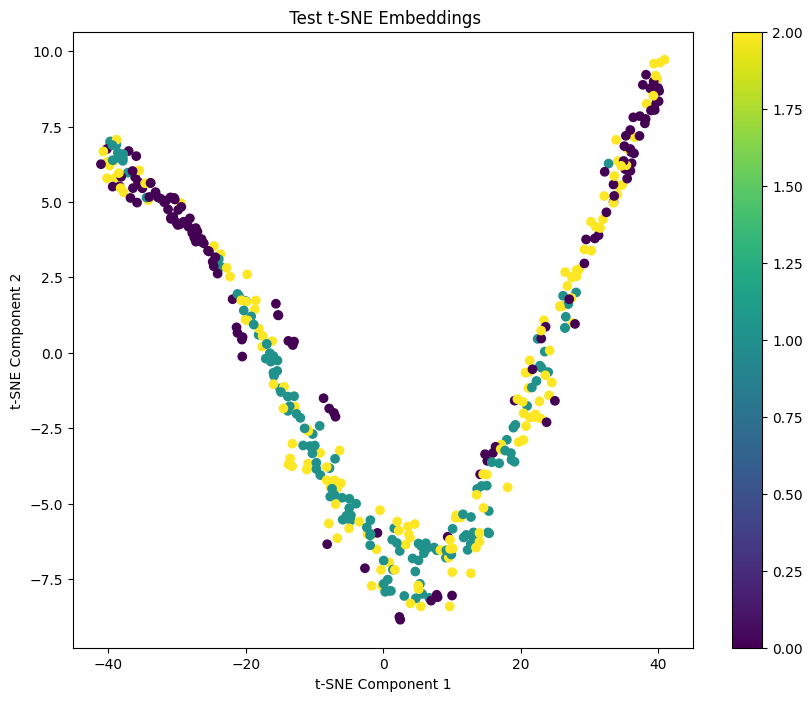

In [ ]:
# Visualize t-SNE embeddings
# Assuming x_train_embed and x_test_embed are the embeddings obtained from the penultimate layer
tsne = TSNE(n_components=2, random_state=42)
x_embed = base_model.predict(x_test)  # Assuming x_test is your test data
x_tsne = tsne.fit_transform(x_embed)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title(' Test t-SNE Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [ ]:
# Visualize t-SNE embeddings
# Assuming x_train_embed and x_test_embed are the embeddings obtained from the penultimate layer
x_test_flat = x_test.reshape((300, 128*128*3))
tsne = TSNE(n_components=2, random_state=42)
#x_embed = base_model.predict(x_test)  # Assuming x_test is your test data
x_tsne = tsne.fit_transform(x_test_flat)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title(' Test Images')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


ValueError: cannot reshape array of size 20643840 into shape (300,49152)

In [ ]:
# Visualize t-SNE embeddings
# Assuming x_train_embed and x_train_embed are the embeddings obtained from the penultimate layer
x_train_flat = x_train.reshape((1200, 128*128*3))
tsne = TSNE(n_components=2, random_state=42)
#x_embed = base_model.predict(x_train)  # Assuming x_train is your train data
x_tsne = tsne.fit_transform(x_train_flat)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title('Train Images')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [ ]:
# Visualize t-SNE embeddings
# Assuming x_train_embed and x_train_embed are the embeddings obtained from the penultimate layer
tsne = TSNE(n_components=2, random_state=42)
x_embed = base_model.predict(x_train)  # Assuming x_train is your train data
x_tsne = tsne.fit_transform(x_embed)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title('Train t-SNE Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


<h1>E-Mixup

In [ ]:
xtest_emb = base_model.predict(x_test)
xtrain_emb = base_model.predict(x_train)

In [ ]:
import keras
y_test_o = keras.utils.to_categorical(y_test)
y_train_o = keras.utils.to_categorical(y_train)
print(y_train_o.shape)
print(y_test_o.shape)

In [ ]:
def mixup(xt, yt, mf):
  alp = 0.2
  xaug = []
  yaug = []
  for k in range(0,xt.shape[0]):
    cnt = 0
    for cnt in range(0,mf-1):
      lbd = np.random.beta(alp,alp)
      yks = np.random.randint(xt.shape[0])
      kdash = xt[yks]
      ydash = yt[yks]
      kdash1 = xt[k]
      ydash1 = yt[k]
      xaug1 = kdash1*lbd + kdash*(1-lbd)
      yaug1 = ydash1*lbd + ydash*(1-lbd)
      xaug.append(xaug1)
      yaug.append(yaug1)
  xs2 = np.asarray(xaug)
  ys2 = np.asarray(yaug)
  x1 = np.concatenate((xt,xs2))
  y1 = np.concatenate((yt,ys2))
  return x1,y1

In [ ]:
xtrain_emb.shape

In [ ]:
xtt, ytt = mixup(xtrain_emb,y_train_o,3)
xtt.shape

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# import tensorflow as tf

# Classifier_model = Sequential()
# #add model layers
# Classifier_model.Input = (125,)

# Classifier_model.add(Dense(512,activation='relu'))
# Classifier_model.add(Dense(512,activation='relu'))

# Classifier_model.add(Dense(3, activation='softmax'))
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Classifier_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
# Classifier_model.fit(xtt, ytt,epochs=25, validation_data=(xtest_emb, y_test_o))

# Classifier_model.evaluate(xtest_emb, y_test_o)

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # Assuming Classifier_model.predict returns probabilities or predicted classes
# y_pred = Classifier_model.predict(xtest_emb)

# # If y_pred contains probabilities, you may want to convert them to classes
# # For binary classification:
# # y_pred_classes = (y_pred > 0.5).astype(int)
# # For multi-class classification with softmax output:
# y_pred_classes = np.argmax(y_pred, axis=1)
# from sklearn.metrics import classification_report

# # Assuming y_pred_classes are predicted classes

# # Generate classification report
# report = classification_report(y_test, y_pred_classes, digits=5)

# # Print the report
# print("Classification Report:")
# print(report)

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf
from sklearn.metrics import classification_report

# Define the list of learning rates to try
learning_rates = [0.003, 0.001, 0.00033, 0.0001]

# Variables to store the best results
best_val_loss = np.inf
best_learning_rate = None
best_model_weights = None

# Assume xtt, ytt, xtest_emb, y_test, y_test_o are already defined and preprocessed
# xtt: Training features
# ytt: Training labels (one-hot encoded)
# xtest_emb: Test features
# y_test_o: Test labels (one-hot encoded)
# y_test: Test labels (integer encoded) for evaluation

for lr in learning_rates:
    print(f"\nTraining model with learning_rate={lr}")

    # Build the model
    Classifier_model = Sequential()
    Classifier_model.add(Dense(512, activation='relu', input_shape=(125,)))
    Classifier_model.add(Dense(512, activation='relu'))
    Classifier_model.add(Dense(3, activation='softmax'))

    # Compile the model with the current learning rate
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    Classifier_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = Classifier_model.fit(
        xtt, ytt,
        epochs=10,
        batch_size=32,
        validation_data=(xtest_emb, y_test_o),
        verbose=0  # Suppress detailed output
    )

    # Get the last validation loss and accuracy
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    print(f"Validation Loss: {val_loss:.5f}, Validation Accuracy: {val_accuracy:.5f}")

    # Update best model if current one is better
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_learning_rate = lr
        best_model_weights = Classifier_model.get_weights()

# Rebuild the model with the best learning rate
Classifier_model = Sequential()
Classifier_model.add(Dense(512, activation='relu', input_shape=(125,)))
Classifier_model.add(Dense(512, activation='relu'))
Classifier_model.add(Dense(3, activation='softmax'))

# Compile the model with the best learning rate
opt = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)
Classifier_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Load the best weights into the model
Classifier_model.set_weights(best_model_weights)

print("\nBest learning rate found:")
print(f"Learning Rate: {best_learning_rate}")
print(f"Best Validation Loss: {best_val_loss:.5f}")

# Evaluate the best model on test data
test_loss, test_accuracy = Classifier_model.evaluate(xtest_emb, y_test_o, verbose=0)
print(f"\nBest Model Test Loss: {test_loss:.5f}, Test Accuracy: {test_accuracy:.5f}")

# Proceed with your code
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming Classifier_model.predict returns probabilities
y_pred = Classifier_model.predict(xtest_emb)

# Convert probabilities to class labels
# For multi-class classification with softmax output
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, digits=5)

# Print the report
print("Classification Report:")
print(report)


In [ ]:
# Classifier_model.evaluate(xtest_emb, y_test_o)

14/14 [==============================] - 0s 3ms/step - loss: 1.1009 - accuracy: 0.3048


[1.100872278213501, 0.3047619163990021]

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # Assuming Classifier_model.predict returns probabilities or predicted classes
# y_pred = Classifier_model.predict(xtest_emb)

# # If y_pred contains probabilities, you may want to convert them to classes
# # For binary classification:
# # y_pred_classes = (y_pred > 0.5).astype(int)
# # For multi-class classification with softmax output:
# y_pred_classes = np.argmax(y_pred, axis=1)
# from sklearn.metrics import classification_report

# # Assuming y_pred_classes are predicted classes

# # Generate classification report
# report = classification_report(y_test, y_pred_classes, digits=5)

# # Print the report
# print("Classification Report:")
# print(report)



14/14 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.30476   1.00000   0.46715       128
           1    0.00000   0.00000   0.00000       138
           2    0.00000   0.00000   0.00000       154

    accuracy                        0.30476       420
   macro avg    0.10159   0.33333   0.15572       420
weighted avg    0.09288   0.30476   0.14237       420



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


E-Stitchup

In [ ]:
import numpy as np

def stichup(xt, yt, mf):
    alp = 0.2
    xaug = []
    yaug = []
    for k in range(xt.shape[0]):
        for _ in range(mf-1):  # Renamed loop counter to avoid confusion with loop index
            lbd = np.random.beta(alp, alp)
            yks = np.random.randint(xt.shape[0])
            kdash = xt[yks]  # Accessing rows of xt directly
            ydash = yt[yks]  # Accessing corresponding y value
            kdash1 = xt[k]    # Accessing rows of xt directly
            ydash1 = yt[k]    # Accessing corresponding y value
            lbd_stch = int(xt.shape[1] * lbd)
            reff_stich = np.zeros(xt.shape[1])
            for i in range(lbd_stch):
                index_stich = np.random.randint(xt.shape[1])
                reff_stich[index_stich] = 1
            xaug1 = np.zeros(xt.shape[1])  # Initialize as numpy array
            for i in range(len(reff_stich)):
                if reff_stich[i] == 0:
                    xaug1[i] = kdash[i]
                else:
                    xaug1[i] = kdash1[i]
            yaug1 = ydash1 * lbd + ydash * (1 - lbd)
            xaug.append(xaug1)
            yaug.append(yaug1)
    xs2 = np.asarray(xaug)
    ys2 = np.asarray(yaug)
    x1 = np.concatenate((xt, xs2))
    y1 = np.concatenate((yt, ys2))
    return x1, y1


In [ ]:
xtt, ytt = stichup(xtrain_emb,y_train_o,3)
xtt.shape

(5040, 125)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# import tensorflow as tf

# Classifier_model = Sequential()
# #add model layers
# Classifier_model.Input = (125,)

# Classifier_model.add(Dense(512,activation='relu'))
# Classifier_model.add(Dense(512,activation='relu'))

# Classifier_model.add(Dense(3, activation='softmax'))
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Classifier_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
# Classifier_model.fit(xtt, ytt,epochs=25, validation_data=(xtest_emb, y_test_o))

# ###############################################
# Classifier_model.evaluate(xtest_emb, y_test_o)

# ###################################################
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # Assuming Classifier_model.predict returns probabilities or predicted classes
# y_pred = Classifier_model.predict(xtest_emb)

# # If y_pred contains probabilities, you may want to convert them to classes
# # For binary classification:
# # y_pred_classes = (y_pred > 0.5).astype(int)
# # For multi-class classification with softmax output:
# y_pred_classes = np.argmax(y_pred, axis=1)
# from sklearn.metrics import classification_report

# # Assuming y_pred_classes are predicted classes

# # Generate classification report
# report = classification_report(y_test, y_pred_classes, digits=5)

# # Print the report
# print("Classification Report:")
# print(report)




from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report

# Define the list of learning rates to try
learning_rates = [0.003, 0.001, 0.00033, 0.0001]

# Variables to store the best results
best_val_loss = np.inf
best_learning_rate = None
best_model_weights = None

# Assume xtt, ytt, xtest_emb, y_test, y_test_o are already defined and preprocessed
# xtt: Training features
# ytt: Training labels (one-hot encoded)
# xtest_emb: Test features
# y_test_o: Test labels (one-hot encoded)
# y_test: Test labels (integer encoded) for evaluation

for lr in learning_rates:
    print(f"\nTraining model with learning_rate={lr}")

    # Build the model
    Classifier_model = Sequential()
    Classifier_model.add(Dense(512, activation='relu', input_shape=(125,)))
    Classifier_model.add(Dense(512, activation='relu'))
    Classifier_model.add(Dense(3, activation='softmax'))

    # Compile the model with the current learning rate
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    Classifier_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = Classifier_model.fit(
        xtt, ytt,
        epochs=25,
        batch_size=32,
        validation_data=(xtest_emb, y_test_o),
        verbose=0  # Suppress detailed output
    )

    # Evaluate the model on validation data
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    print(f"Validation Loss: {val_loss:.5f}, Validation Accuracy: {val_accuracy:.5f}")

    # Update best model if current one is better
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_learning_rate = lr
        best_model_weights = Classifier_model.get_weights()

# Load the best model weights into Classifier_model
# Build the model again to ensure it's in the correct state
Classifier_model = Sequential()
Classifier_model.add(Dense(512, activation='relu', input_shape=(125,)))
Classifier_model.add(Dense(512, activation='relu'))
Classifier_model.add(Dense(3, activation='softmax'))

# Compile the model with the best learning rate
opt = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)
Classifier_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Set the weights to the best model weights
Classifier_model.set_weights(best_model_weights)

print("\nBest learning rate found:")
print(f"Learning Rate: {best_learning_rate}")
print(f"Best Validation Loss: {best_val_loss:.5f}")

# Evaluate the best model on test data
test_loss, test_accuracy = Classifier_model.evaluate(xtest_emb, y_test_o, verbose=0)
print(f"\nBest Model Test Loss: {test_loss:.5f}, Test Accuracy: {test_accuracy:.5f}")

# Proceed with your code

# Assuming Classifier_model.predict returns probabilities
y_pred = Classifier_model.predict(xtest_emb)

# Convert probabilities to class labels
# For multi-class classification with softmax output
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, digits=5)

# Print the report
print("Classification Report:")
print(report)


Training model with learning_rate=0.003
Validation Loss: 1.10170, Validation Accuracy: 0.30476

Training model with learning_rate=0.001
Validation Loss: 1.10190, Validation Accuracy: 0.30476

Training model with learning_rate=0.00033
Validation Loss: 1.10209, Validation Accuracy: 0.30476

Training model with learning_rate=0.0001
Validation Loss: 1.10055, Validation Accuracy: 0.30476

Best learning rate found:
Learning Rate: 0.0001
Best Validation Loss: 1.10055

Best Model Test Loss: 1.10055, Test Accuracy: 0.30476
14/14 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.30476   1.00000   0.46715       128
           1    0.00000   0.00000   0.00000       138
           2    0.00000   0.00000   0.00000       154

    accuracy                        0.30476       420
   macro avg    0.10159   0.33333   0.15572       420
weighted avg    0.09288   0.30476   0.14237       420



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Classifier_model.evaluate(xtest_emb, y_test_o)

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # Assuming Classifier_model.predict returns probabilities or predicted classes
# y_pred = Classifier_model.predict(xtest_emb)

# # If y_pred contains probabilities, you may want to convert them to classes
# # For binary classification:
# # y_pred_classes = (y_pred > 0.5).astype(int)
# # For multi-class classification with softmax output:
# y_pred_classes = np.argmax(y_pred, axis=1)
# from sklearn.metrics import classification_report

# # Assuming y_pred_classes are predicted classes

# # Generate classification report
# report = classification_report(y_test, y_pred_classes, digits=5)

# # Print the report
# print("Classification Report:")
# print(report)

